# Amazon Sale Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os

# Data Cleaning

In [2]:
df=pd.read_csv('Amazon_Sale_Report.csv',encoding= 'unicode_escape')

In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.drop(['New','PendingS'], axis=1, inplace=True)


In [8]:
# checking null value
pd.isnull(df) 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [9]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(37514, 19)

In [13]:
#change Data Type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [14]:
df.rename(columns={'Qty':'Quantity'},inplace=True)
df.rename(columns={'Fulfilment':'Fulfillment '},inplace=True)

In [15]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfillment ', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [16]:
df.describe()

,index,Quantity,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [17]:
df.describe(include='object')

,Order ID,Date,Status,Fulfillment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [18]:
#use describe() for specific columns
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Exploratory Data Analysis


In [19]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfillment ', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

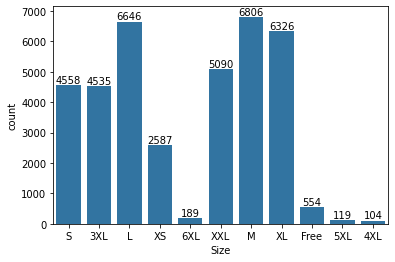

In [20]:
# count of diferrent Sizes
gra=sns.countplot(data=df,x='Size')
for bars in gra.containers:
    gra.bar_label(bars)

maximum count of Size is M 

In [21]:
df.groupby(by=['Size']).agg({'Quantity':'sum'}).sort_values(by=['Quantity'],ascending=False)

,Quantity
Size,
M,5905
L,5795
XL,5481
XXL,4465
3XL,3972
S,3896
XS,2191
Free,467
6XL,170


<Axes: xlabel='Courier Status', ylabel='count'>

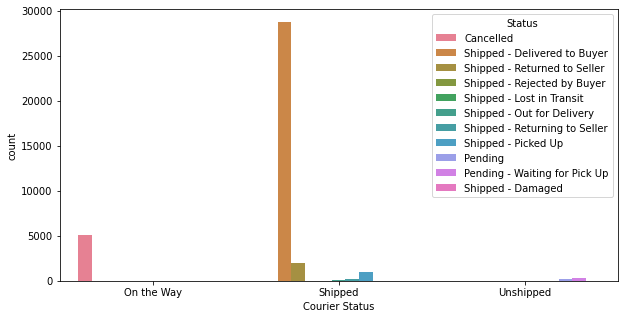

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Courier Status',data=df,hue='Status')

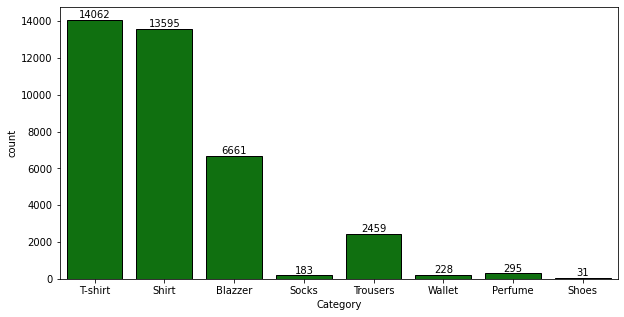

In [23]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x='Category',data=df, color='Green',edgecolor='Black')
for bars in plot.containers:
    plot.bar_label(bars)

maximum buyers is from T-shirt 

B2B
False    37228
True       286
Name: count, dtype: int64


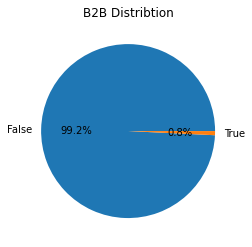

In [24]:
# Checking B2B Data  by using pie chart 
B2B_count = df['B2B'].value_counts()
print(B2B_count)
plt.figure(figsize=(4,4))
plt.pie(B2B_count, labels=B2B_count.index, autopct='%1.1f%%')
plt.title('B2B Distribtion')
plt.show()

Maximum buyers are retailers 99.2% and 0.8% are B2B.

Fulfillment 
Merchant    37514
Name: count, dtype: int64


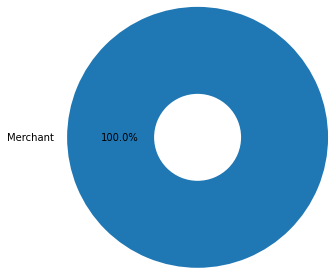

In [35]:
# fulfillment 
fulfillment=df['Fulfillment '].value_counts()
print(fulfillment)
plt.pie(fulfillment, labels=fulfillment.index, radius=1.5,autopct='%1.1f%%',wedgeprops=dict(width=1))
plt.show()

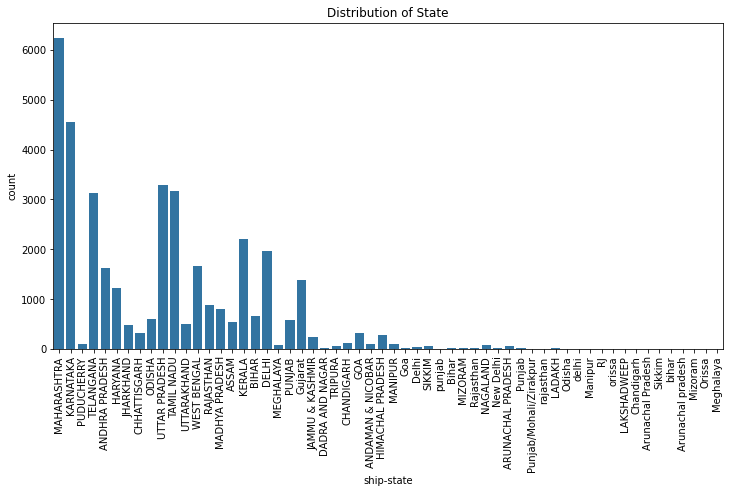

In [27]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

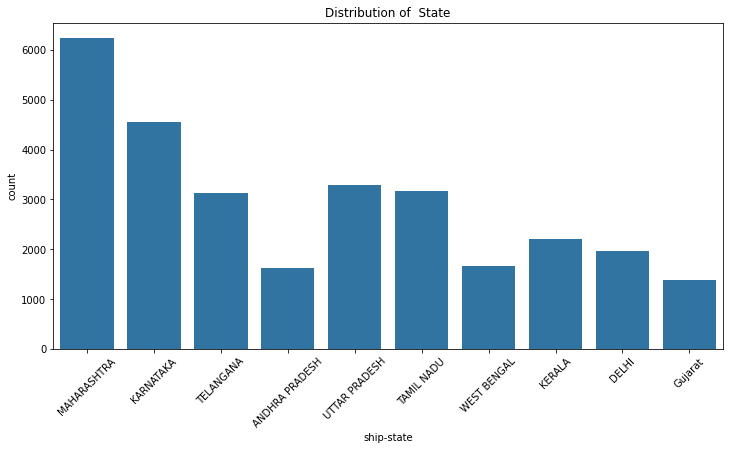

In [28]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

Conclusion :

The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.